In [1]:
pip install yfinance



SyntaxError: invalid syntax (2977875142.py, line 1)

In [2]:
import yfinance as yf

In [3]:
from datetime import datetime
end=datetime.now()
start=datetime(end.year-20,end.month,end.day)

In [4]:
stock="GOOGL"
google_data=yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [5]:
google_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.502503,2.604104,2.401401,2.511011,2.511011,893181924
2004-08-20,2.527778,2.729730,2.515015,2.710460,2.710460,456686856
2004-08-23,2.771522,2.839840,2.728979,2.737738,2.737738,365122512
2004-08-24,2.783784,2.792793,2.591842,2.624374,2.624374,304946748
2004-08-25,2.626627,2.702703,2.599600,2.652653,2.652653,183772044


In [6]:
google_data.shape


(4941, 6)

In [7]:
google_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4.941000e+03
mean,43.264926,43.719063,42.816034,43.278419,43.278419,1.189686e+08
std,40.122890,40.572582,39.702910,40.149350,40.149350,1.486201e+08
min,2.482232,2.546046,2.401401,2.502753,2.502753,9.312000e+06
25%,12.996246,13.113113,12.862863,12.988739,12.988739,3.158000e+07
50%,27.328501,27.493999,27.112499,27.300501,27.300501,6.259000e+07
75%,59.212502,59.771500,58.605000,59.199501,59.199501,1.446792e+08
max,153.600006,155.740005,152.729996,155.490005,155.490005,1.643023e+09


In [12]:
google_data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4941 entries, 2004-08-19 to 2024-04-05
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Open            4941 non-null   float64
 1   High            4941 non-null   float64
 2   Low             4941 non-null   float64
 3   Close           4941 non-null   float64
 4   Adj Close       4941 non-null   float64
 5   Volume          4941 non-null   int64  
 6   MA_for_250days  4692 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 308.8 KB


In [9]:
google_data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


Text(0.5, 1.0, 'Closing Price of Google data')

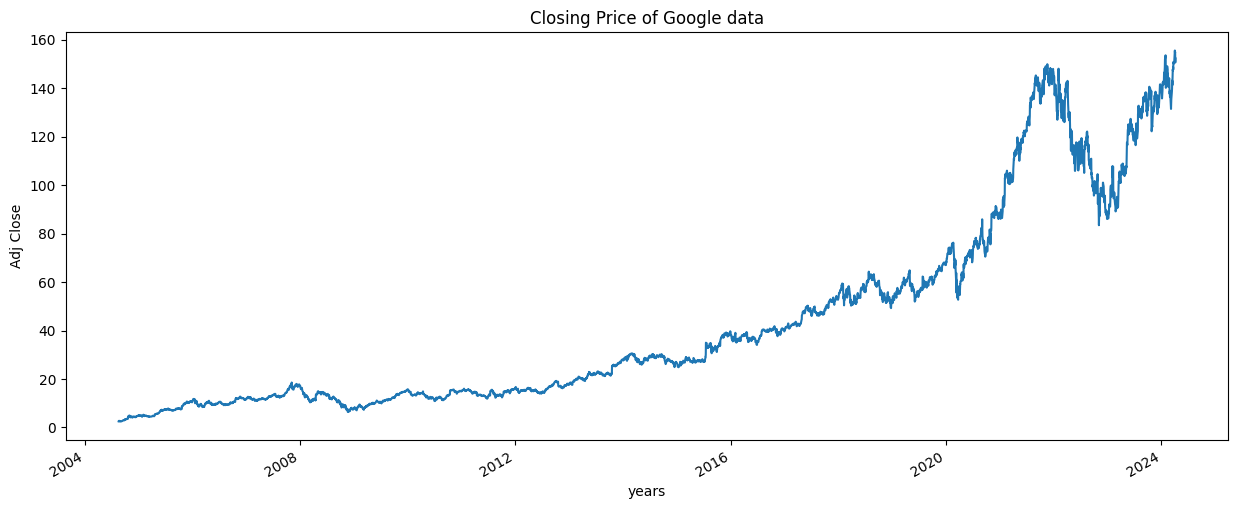

In [64]:
plt.figure(figsize=(15,6))
google_data['Adj Close'].plot()
plt.xlabel("years")
plt.ylabel("Adj Close")
plt.title("Closing Price of Google data")

In [15]:
def plot_graph(figsize,values,column_name):
    plt.figure()
    values.plot(figsize=figsize)
    plt.xlabel("years")
    plt.ylabel(column_name)
    plt.title(f"{column_name} of Google data")

In [16]:
google_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'MA_for_250days'],
      dtype='object')

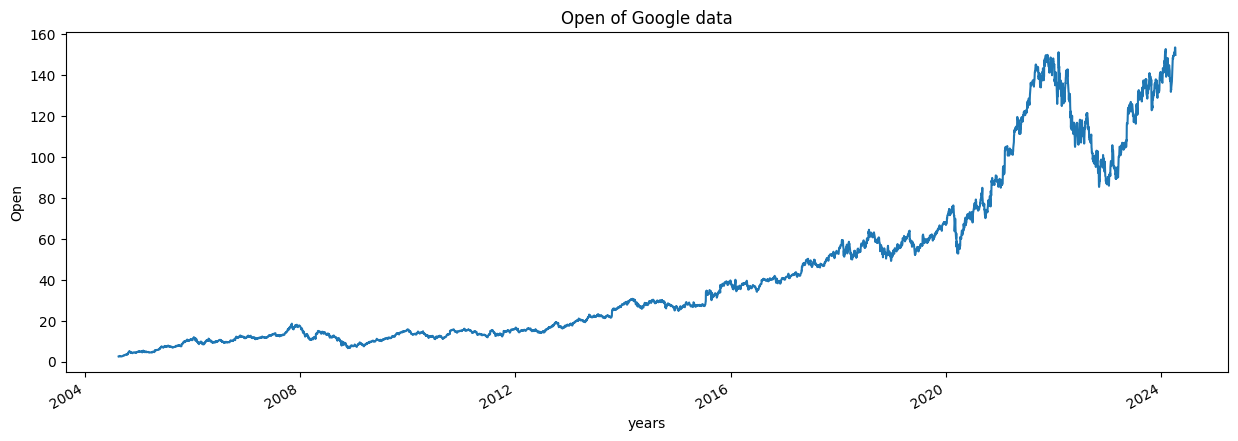

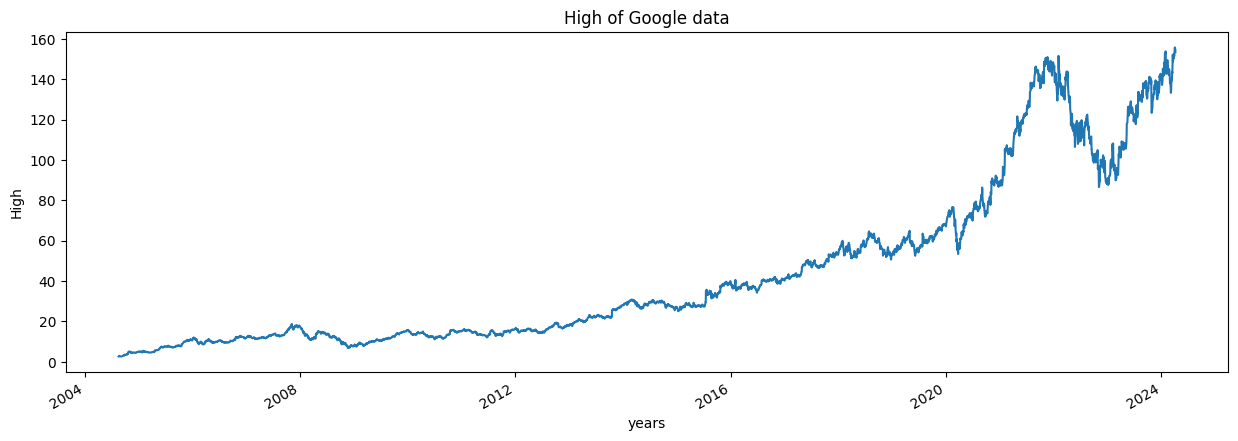

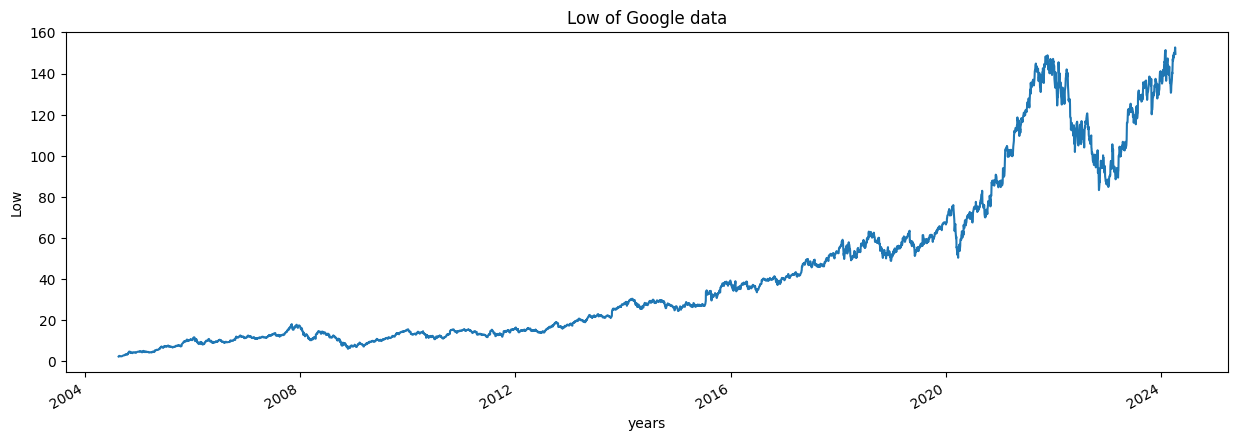

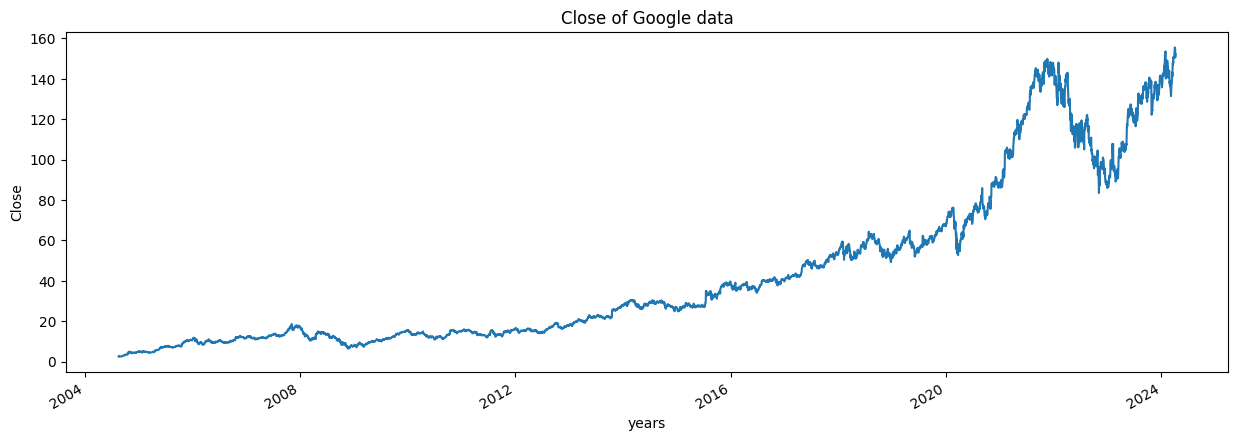

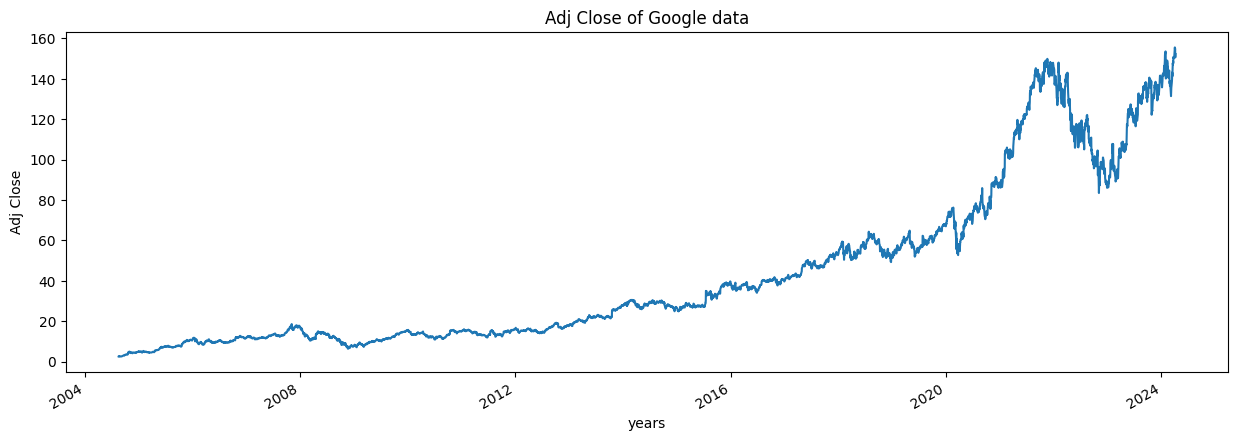

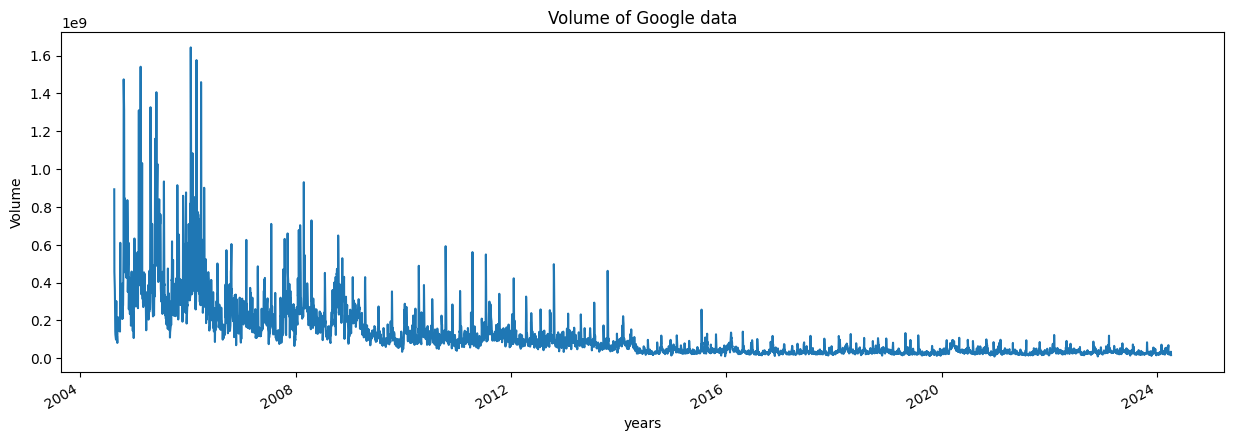

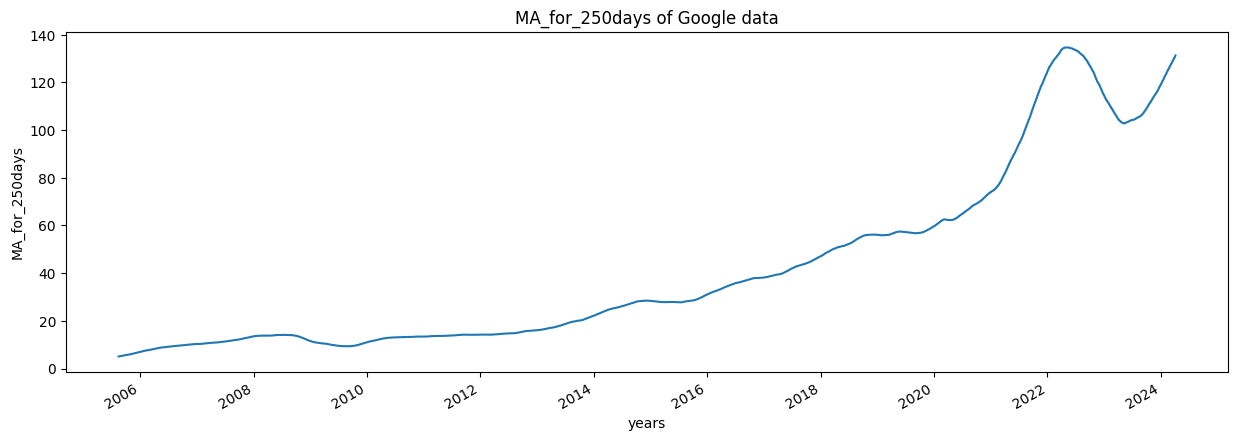

In [17]:
for column in google_data.columns:
    plot_graph((15,5),google_data[column],column)

In [18]:
for i in range(2004,2025):
    print(i,list(google_data.index.year).count(i))

2004 94
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 66


In [19]:
google_data['MA_for_250days']=google_data['Adj Close'].rolling(250).mean()

In [20]:
google_data['MA_for_250days'][:250].tail()

Date
2005-08-09         NaN
2005-08-10         NaN
2005-08-11         NaN
2005-08-12         NaN
2005-08-15    5.057966
Name: MA_for_250days, dtype: float64

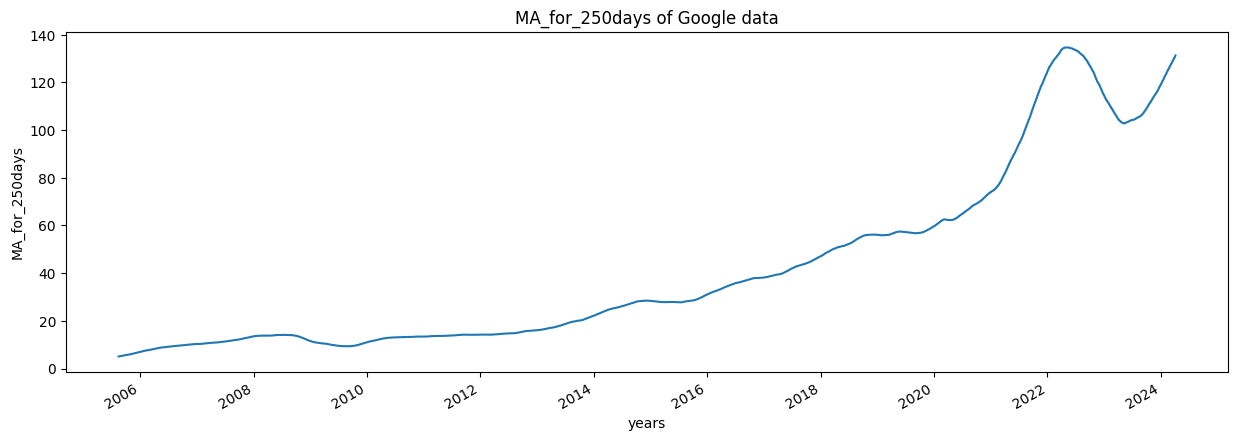

In [21]:
plot_graph((15,5),google_data['MA_for_250days'],'MA_for_250days')

<Figure size 640x480 with 0 Axes>

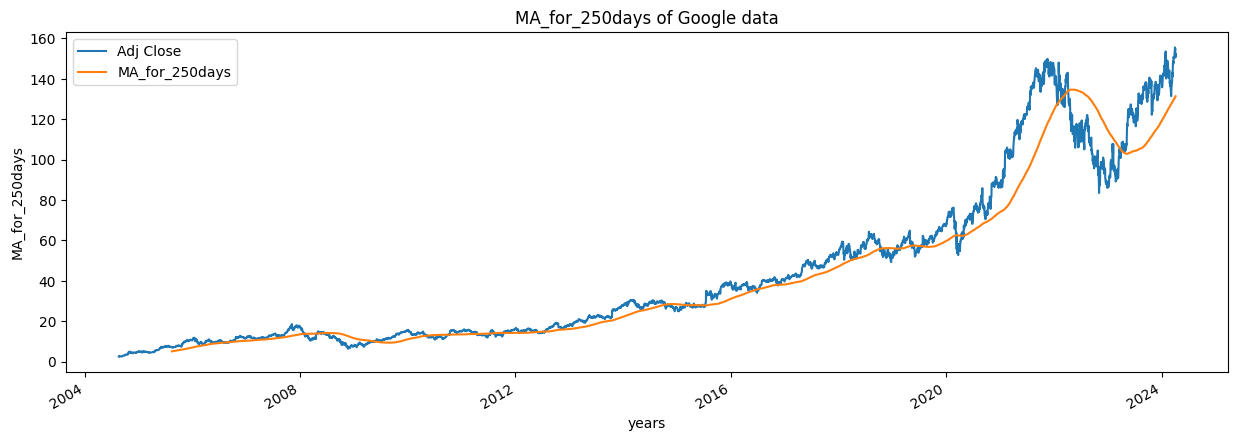

In [22]:
plot_graph((15,5),google_data[['Adj Close','MA_for_250days']],'MA_for_250days')

<Figure size 640x480 with 0 Axes>

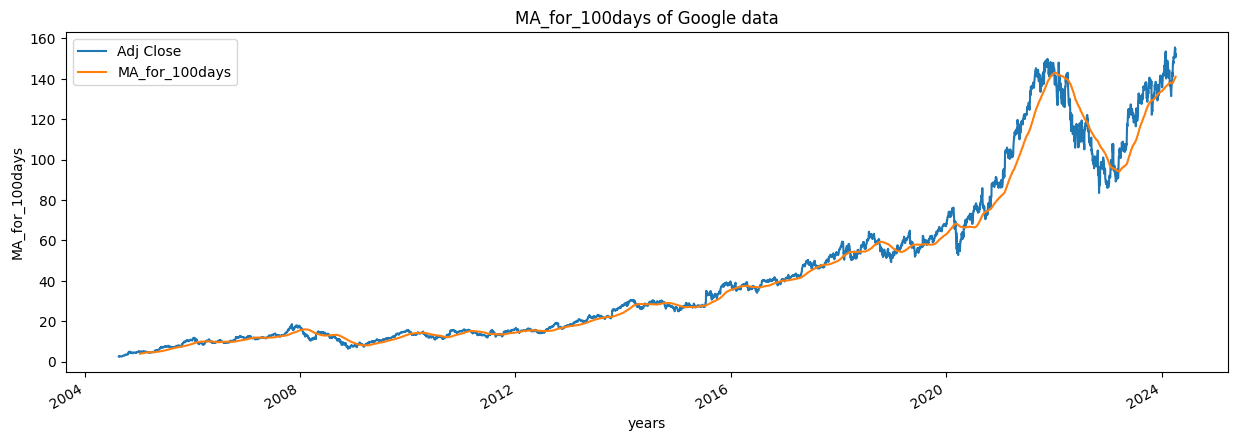

In [23]:
google_data['MA_for_100days']=google_data['Adj Close'].rolling(100).mean()
plot_graph((15,5),google_data[['Adj Close','MA_for_100days']],'MA_for_100days')


<Figure size 640x480 with 0 Axes>

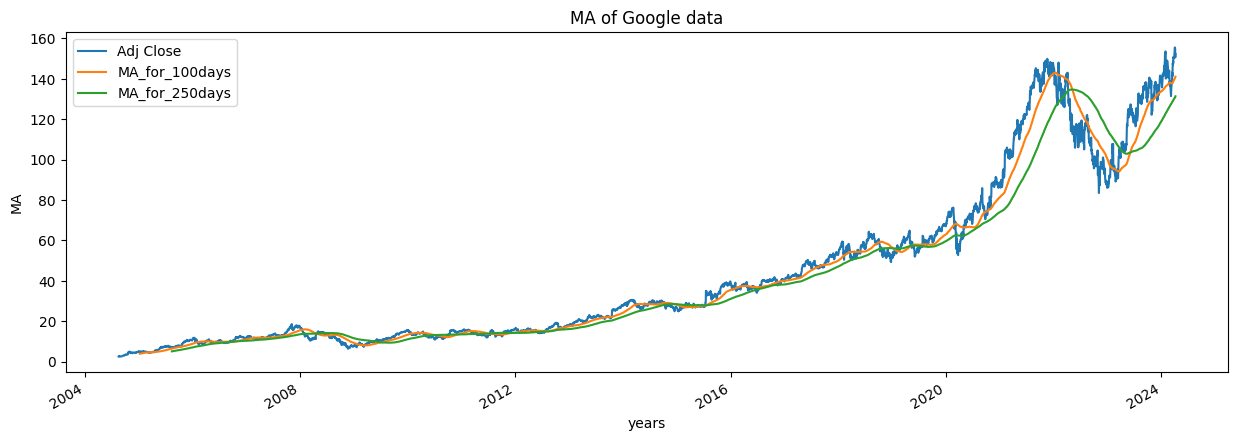

In [24]:
plot_graph((15,5),google_data[['Adj Close','MA_for_100days','MA_for_250days']],'MA')


In [25]:
google_data['percentage_change_cp']=google_data['Adj Close'].pct_change()
google_data[['Adj Close','percentage_change_cp']].head()


,Adj Close,percentage_change_cp
Date,,
2004-08-19,2.511011,NaN
2004-08-20,2.710460,0.079430
2004-08-23,2.737738,0.010064
2004-08-24,2.624374,-0.041408
2004-08-25,2.652653,0.010776


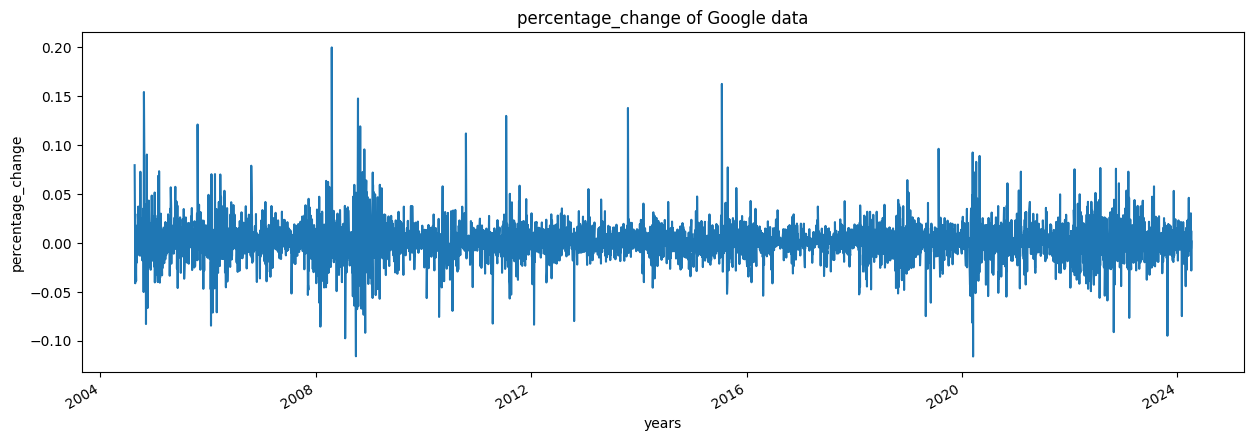

In [26]:
plot_graph((15,5),google_data['percentage_change_cp'],'percentage_change')


In [27]:
Adj_close_price=google_data[['Adj Close']]

In [28]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([155.49000549]), array([2.50275302]))

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(Adj_close_price)
scaled_data

array([[5.39774770e-05],
       [1.35767474e-03],
       [1.53597683e-03],
       ...,
       [9.96274152e-01],
       [9.67578954e-01],
       [9.78690971e-01]])

In [30]:
len(scaled_data)

4941

In [31]:
x_data=[]
y_data=[]

for i in range(100,len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data,y_data=np.array(x_data),np.array(y_data)

In [32]:
x_data[0],y_data[0]

(array([[5.39774770e-05],
        [1.35767474e-03],
        [1.53597683e-03],
        [7.94974035e-04],
        [9.79819934e-04],
        [1.29224443e-03],
        [1.00435104e-03],
        [3.27151572e-04],
        [3.86038076e-04],
        [3.92581887e-05],
        [2.45360952e-04],
        [0.00000000e+00],
        [2.56812231e-04],
        [3.74586797e-04],
        [3.76220023e-04],
        [8.70222404e-04],
        [1.22518089e-03],
        [1.87784925e-03],
        [1.96127465e-03],
        [2.28351720e-03],
        [2.85930396e-03],
        [3.16519244e-03],
        [2.91655724e-03],
        [3.00488388e-03],
        [3.40401581e-03],
        [3.24207403e-03],
        [2.98525557e-03],
        [4.39201278e-03],
        [5.08229987e-03],
        [4.84020693e-03],
        [5.32766550e-03],
        [5.73333345e-03],
        [6.27477106e-03],
        [6.06375303e-03],
        [6.35328743e-03],
        [6.17008255e-03],
        [5.76604939e-03],
        [6.11609728e-03],
        [6.6

In [33]:
splitting_len=int(len(x_data)*0.7)
x_train=x_data[:splitting_len]
y_train=y_data[:splitting_len]

x_test=x_data[splitting_len:]
y_test=y_data[splitting_len:]

In [34]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3388, 100, 1)
(3388, 1)
(1453, 100, 1)
(1453, 1)


In [35]:
from keras.models import Sequential
from keras.layers import Dense,LSTM

In [37]:
model=Sequential()
model.add(LSTM(128,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\nsanj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [38]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [40]:
model.fit(x_train,y_train,batch_size=1,epochs=2)

Epoch 1/2
3388/3388 ━━━━━━━━━━━━━━━━━━━━ 170s 49ms/step - loss: 3.2474e-04
Epoch 2/2
3388/3388 ━━━━━━━━━━━━━━━━━━━━ 165s 49ms/step - loss: 8.8883e-05


In [41]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [42]:
predictions=model.predict(x_test)

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step


In [43]:
predictions


array([[0.35284442],
       [0.3486724 ],
       [0.34880698],
       ...,
       [0.9576297 ],
       [0.9596489 ],
       [0.94323814]], dtype=float32)

In [45]:
inv_predictions=scaler.inverse_transform(predictions)
inv_predictions

array([[ 56.48345 ],
       [ 55.845184],
       [ 55.865776],
       ...,
       [149.00789 ],
       [149.3168  ],
       [146.80617 ]], dtype=float32)

In [46]:
inv_y_test=scaler.inverse_transform(y_test)
inv_y_test

array([[ 55.84700012],
       [ 56.3390007 ],
       [ 56.45949936],
       ...,
       [154.91999817],
       [150.52999878],
       [152.22999573]])

In [47]:
rmse=np.sqrt(np.mean((inv_predictions-inv_y_test)**2))

In [48]:
rmse

3.1631146210087335

In [57]:


ploting_data=pd.DataFrame(
    {
        'original_test_data':inv_y_test.reshape(-1),
        'predictions':inv_predictions.reshape(-1)
    },
    index=google_data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-06-27,55.847000,56.483452
2018-06-28,56.339001,55.845184
2018-06-29,56.459499,55.865776
2018-07-02,57.105499,56.068359
2018-07-03,55.813999,56.550529


<Figure size 640x480 with 0 Axes>

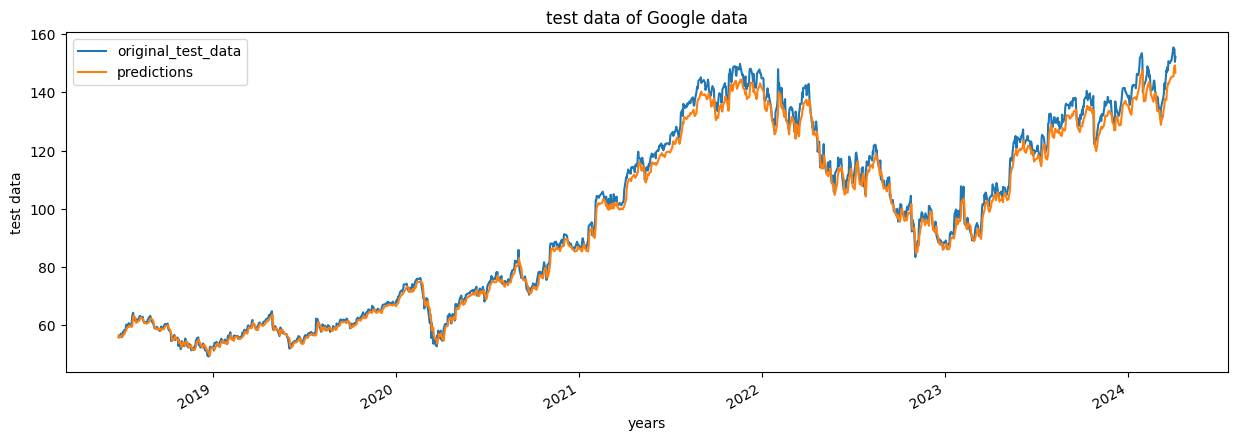

In [58]:
plot_graph((15,5),ploting_data,'test data')

<Figure size 640x480 with 0 Axes>

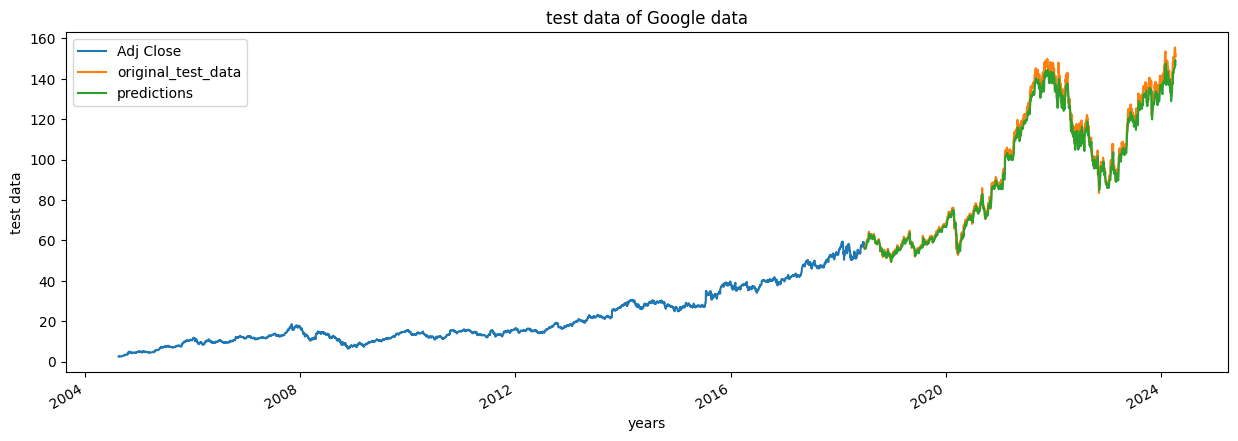

In [61]:
plot_graph((15,5),pd.concat([Adj_close_price[:splitting_len+100],ploting_data],axis=0),'test data')

In [63]:
model.save("Stock_Price_Model.keras")